---

# <center> ★ AI / ML Project - Loan Defaulter Risk Expectancy ★
#### <center> ***Domain: Finance***

---

<img src="loan.jpg" style="width: 600px;"/>

---

### Description:

Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters? 


### Acknowledgements:
This dataset has been referred from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict weather the loan borrower will default or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [34]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [35]:
#Importing the dataset

df = pd.read_csv('Loan_Default.csv')
df.drop(['ID','year'],axis=1, inplace=True)

target = 'Status'
labels = ['Defaulter','Not-Defaulter']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0



Inference: The Datset consists of 32 features & 148670 samples.


In [36]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [37]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

loan_limit                       2
Security_Type                    2
submission_of_application        2
co-applicant_credit_type         2
Secured_by                       2
construction_type                2
Status                           2
interest_only                    2
Neg_ammortization                2
lump_sum_payment                 2
business_or_commercial           2
open_credit                      2
approv_in_adv                    2
Credit_Worthiness                2
occupancy_type                   3
loan_type                        3
total_units                      4
Gender                           4
Region                           4
loan_purpose                     4
credit_type                      4
age                              7
term                            26
dtir1                           57
rate_of_interest               131
loan_amount                    211
property_value                 385
Credit_Score                   401
income              

In [38]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 21 categorical features.


In [39]:
#Checking the stats of all the columns

display(df.describe())

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


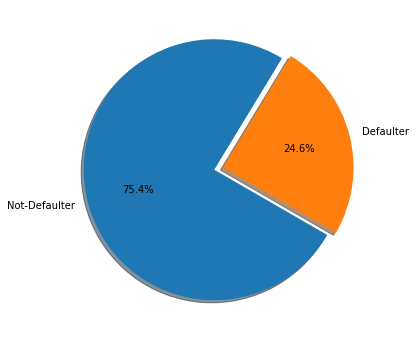

In [33]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.07
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                               Visualising Categorical Features:                                


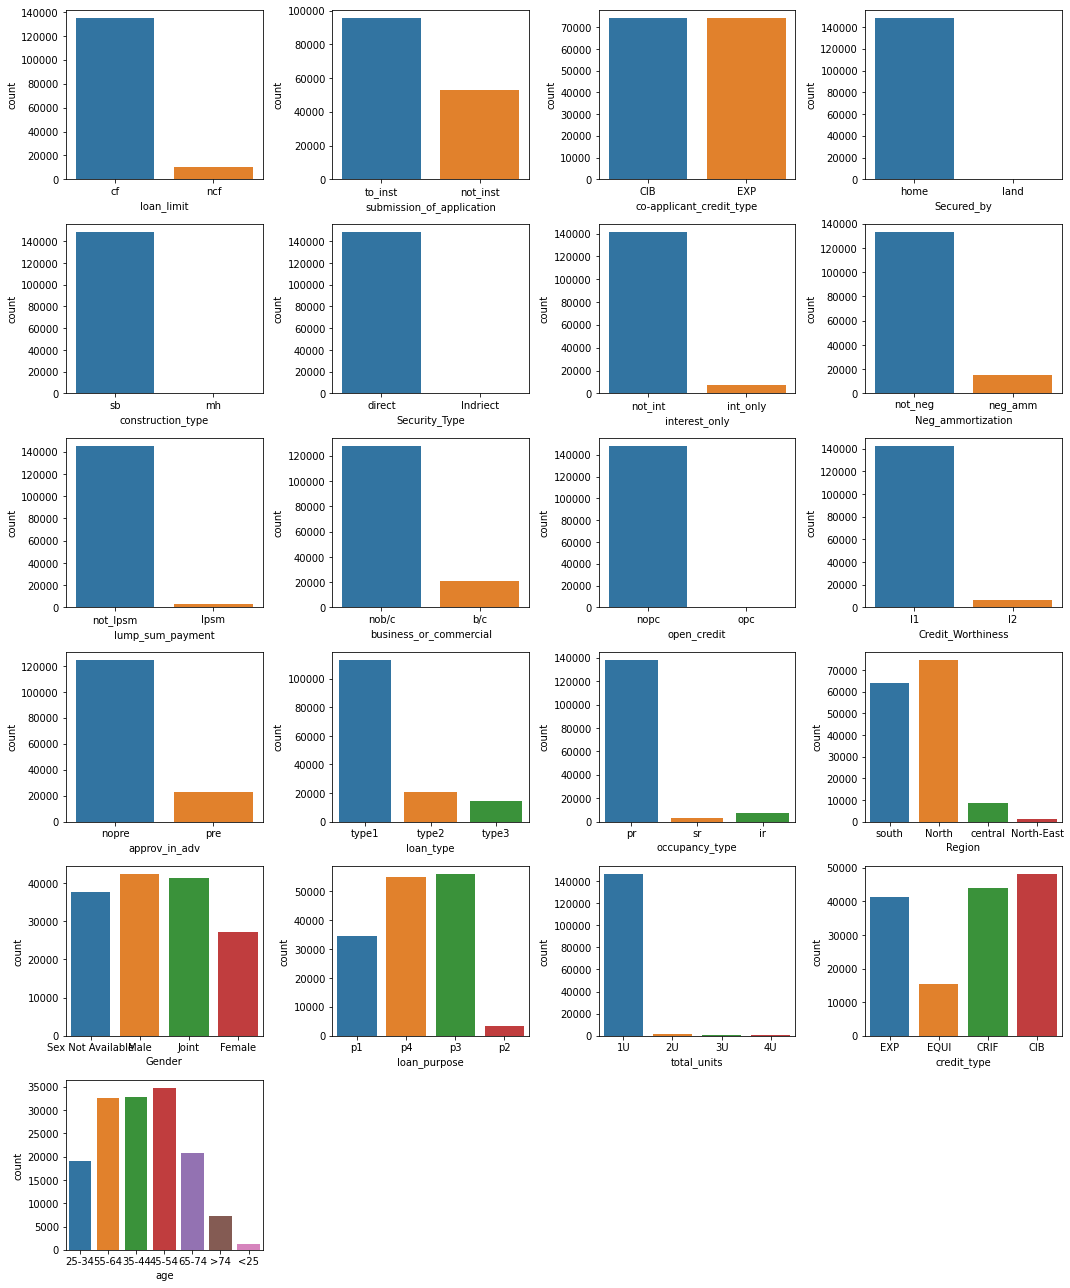

In [35]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=4
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=15:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    #else:
    #    plt.subplot(2,2,i)
    #    sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** 

                                     Features Distribution                                      


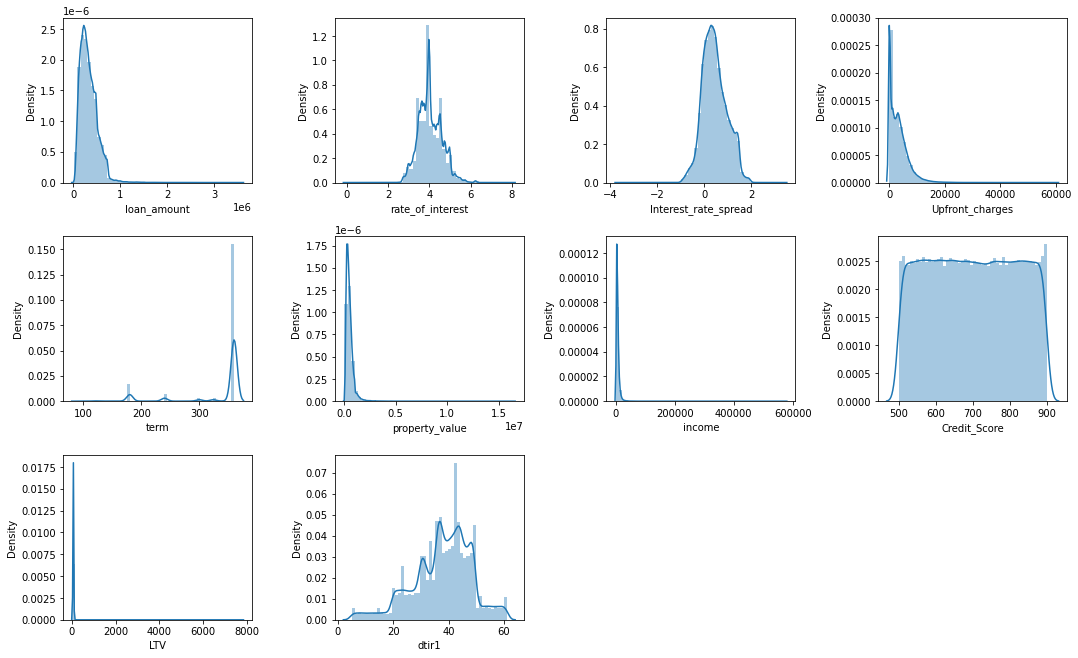

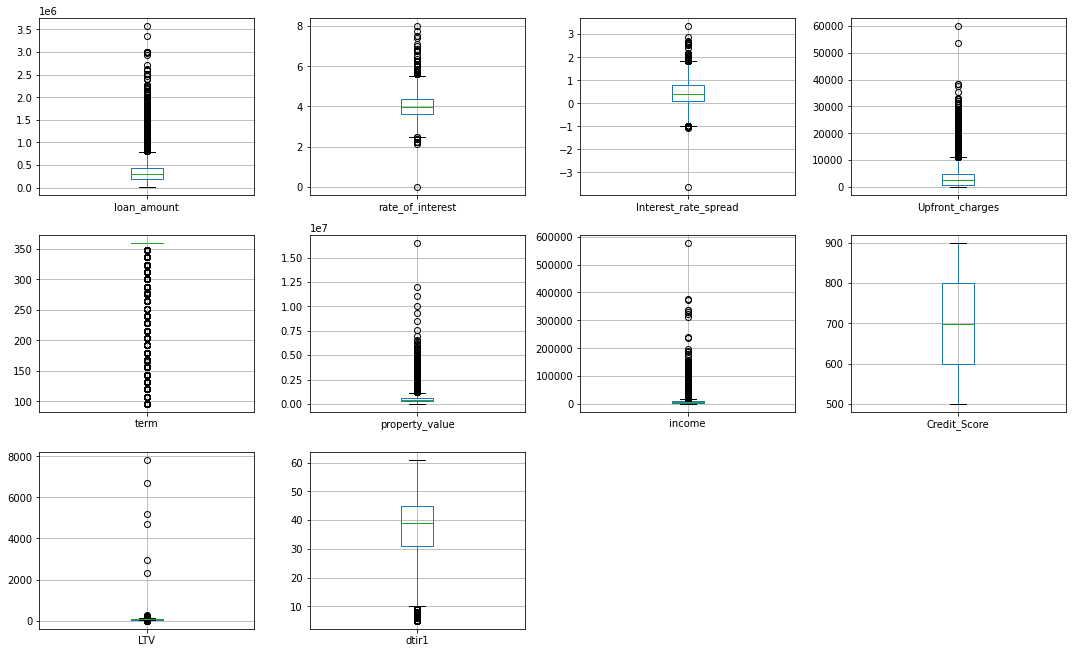

In [37]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

n=4
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

In [ ]:
#Understanding the relationship between all the features

ppc=[i for i in df1.columns if i not in cf]
g=sns.pairplot(df1[ppc], hue=target, size=4)
#g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [7]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

                           Total Null Values  Percentage
lump_sum_payment                           0         0.0
co-applicant_credit_type                   0         0.0
total_units                                0         0.0
Secured_by                                 0         0.0
occupancy_type                             0         0.0
construction_type                          0         0.0
Status                                     0         0.0
interest_only                              0         0.0
credit_type                                0         0.0
Region                                     0         0.0
Credit_Score                               0         0.0
loan_amount                                0         0.0
business_or_commercial                     0         0.0
open_credit                                0         0.0
Credit_Worthiness                          0         0.0
loan_type                                  0         0.0
Gender                         

In [8]:
from sklearn.impute import SimpleImputer


for i in nf:
    SI = SimpleImputer(strategy='mean')
    df[i] = SI.fit_transform(df[[i]])
    
for i in cf:
    SI = SimpleImputer(strategy='most_frequent')
    df[i] = SI.fit_transform(df[[i]])

In [9]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [10]:
#Converting categorical Columns to Numeric

df1 = df.copy()

#Target Variable
#MAP={}
#for i,e in enumerate(df1[target].unique()):
#    MAP[e]=i
#df1[target]=df1[target].map(MAP)
#print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df1[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df1[i]=pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
    if (df1[i].nunique()>2 and df1[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df1 = pd.concat([df1.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df1[i], drop_first=True, prefix=str(i)))],axis=1)

One-Hot Encoding on features:
loan_limit
submission_of_application
co-applicant_credit_type
Secured_by
construction_type
Security_Type
interest_only
Neg_ammortization
lump_sum_payment
business_or_commercial
open_credit
Credit_Worthiness
approv_in_adv

Dummy Encoding on features:
loan_type
occupancy_type
Region
Gender
loan_purpose
total_units
credit_type
age


In [11]:
#Removal of outlier:

df3 = df1.copy()

for i in [i for i in df3.columns]:
    if df3[i].nunique()>=12:
        Q1 = df3[i].quantile(0.25)
        Q3 = df3[i].quantile(0.75)
        IQR = Q3 - Q1
        df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
        df3 = df3[df3[i] >= (Q1-(1.5*IQR))]
df3 = df3.reset_index(drop=True)
display(df3.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df3.shape[0]))

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,0,0,0,0,1,116500.0,4.045476,0.441656,3224.996127,360.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,206500.0,4.045476,0.441656,3224.996127,360.0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,406500.0,4.560000,0.200000,595.000000,360.0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,456500.0,4.250000,0.681000,3224.996127,360.0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,1,696500.0,4.000000,0.304200,0.000000,360.0,...,0,1,0,0,0,0,0,0,0,0



Inference: Before removal of outliers, The dataset had 148670 samples.
Inference: After removal of outliers, The dataset now has 80276 samples.


In [12]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    56766
1    23510
Name: Status, dtype: int64

Class distribution after applying SMOTE Technique:
1    56766
0    56766
Name: Status, dtype: int64


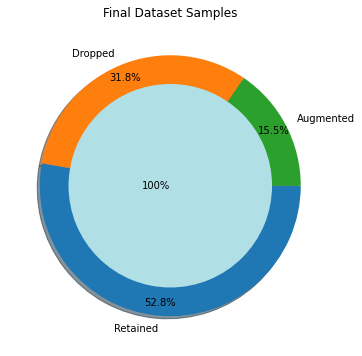


Inference:The final dataset after cleanup has 113532 samples & 49 columns.


In [13]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [14]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (113532, 48) (113532,) 
Training set  --->  (90825, 48) (90825,) 
Testing set   --->  (22707, 48)  (22707,)


In [15]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
count,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,90825.0,...,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04,9.082500e+04
mean,-2.229614e-17,4.772156e-17,5.311957e-17,-4.341880e-18,-5.104642e-17,1.660084e-16,2.819405e-15,-1.838454e-16,-1.425388e-16,0.0,...,4.693924e-19,2.605128e-17,2.206144e-17,-1.136907e-16,-5.679648e-17,3.477415e-17,-1.008998e-16,3.520443e-19,6.180333e-17,-9.153152e-18
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.0,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.983788e-01,-3.710434e-01,-1.552651e-01,-1.877365e-02,-1.892259e+00,-1.991382e+00,-3.328375e+00,-2.991325e+00,-1.751025e+00,0.0,...,-2.527842e-02,-5.273777e-01,-5.606794e-01,-5.060485e-01,-4.698576e-01,-4.484627e-01,-4.239992e-01,-3.415212e-01,-8.691708e-02,-1.913476e-01
25%,-1.983788e-01,-3.710434e-01,-1.552651e-01,-1.877365e-02,5.284689e-01,-7.530495e-01,-1.999428e-01,-2.429614e-01,-4.660288e-01,0.0,...,-2.527842e-02,-5.273777e-01,-5.606794e-01,-5.060485e-01,-4.698576e-01,-4.484627e-01,-4.239992e-01,-3.415212e-01,-8.691708e-02,-1.913476e-01
50%,-1.983788e-01,-3.710434e-01,-1.552651e-01,-1.877365e-02,5.284689e-01,-1.664711e-01,-2.463746e-02,1.531047e-01,2.278626e-01,0.0,...,-2.527842e-02,-5.273777e-01,-5.606794e-01,-5.060485e-01,-4.698576e-01,-4.484627e-01,-4.239992e-01,-3.415212e-01,-8.691708e-02,-1.913476e-01
75%,-1.983788e-01,-3.710434e-01,-1.552651e-01,-1.877365e-02,5.284689e-01,6.808088e-01,-2.463746e-02,1.531047e-01,2.278626e-01,0.0,...,-2.527842e-02,-5.273777e-01,-5.606794e-01,-5.060485e-01,-4.698576e-01,-4.484627e-01,-4.239992e-01,-3.415212e-01,-8.691708e-02,-1.913476e-01
max,5.040862e+00,2.695103e+00,6.440597e+00,5.326614e+01,5.284689e-01,3.092298e+00,2.991690e+00,2.965505e+00,3.045110e+00,0.0,...,3.955943e+01,1.896174e+00,1.783550e+00,1.976095e+00,2.128305e+00,2.229840e+00,2.358495e+00,2.928076e+00,1.150522e+01,5.226092e+00



                                Standardardization on Testing set                                


,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
count,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.0,...,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000,22707.000000
mean,-0.001333,-0.007405,-0.001312,-0.011734,0.002363,0.008216,0.006627,0.004510,-0.003843,0.0,...,0.007844,-0.000658,-0.002470,0.009029,0.002816,-0.006502,-0.003445,0.004344,0.021311,-0.004301
std,0.996788,0.991352,0.995888,0.612443,0.998407,1.000172,0.998715,0.993544,0.999235,0.0,...,1.144596,0.999571,0.998507,1.006596,1.002351,0.994192,0.996678,1.005616,1.114870,0.989127
min,-0.198379,-0.371043,-0.155265,-0.018774,-1.892259,-1.926206,-3.328375,-2.992439,-1.751025,0.0,...,-0.025278,-0.527378,-0.560679,-0.506048,-0.469858,-0.448463,-0.423999,-0.341521,-0.086917,-0.191348
25%,-0.198379,-0.371043,-0.155265,-0.018774,0.528469,-0.753050,-0.199943,-0.241105,-0.478359,0.0,...,-0.025278,-0.527378,-0.560679,-0.506048,-0.469858,-0.448463,-0.423999,-0.341521,-0.086917,-0.191348
50%,-0.198379,-0.371043,-0.155265,-0.018774,0.528469,-0.166471,-0.024637,0.153105,0.227863,0.0,...,-0.025278,-0.527378,-0.560679,-0.506048,-0.469858,-0.448463,-0.423999,-0.341521,-0.086917,-0.191348
75%,-0.198379,-0.371043,-0.155265,-0.018774,0.528469,0.680809,-0.024637,0.153105,0.227863,0.0,...,-0.025278,-0.527378,-0.560679,-0.506048,-0.469858,-0.448463,-0.423999,-0.341521,-0.086917,-0.191348
max,5.040862,2.695103,6.440597,53.266136,0.528469,3.092298,2.991690,2.966619,3.045251,0.0,...,39.559427,1.896174,1.783550,1.976095,2.128305,2.229840,2.358495,2.928076,11.505218,5.226092


---

## <center> 5. Feature Selection/Extraction

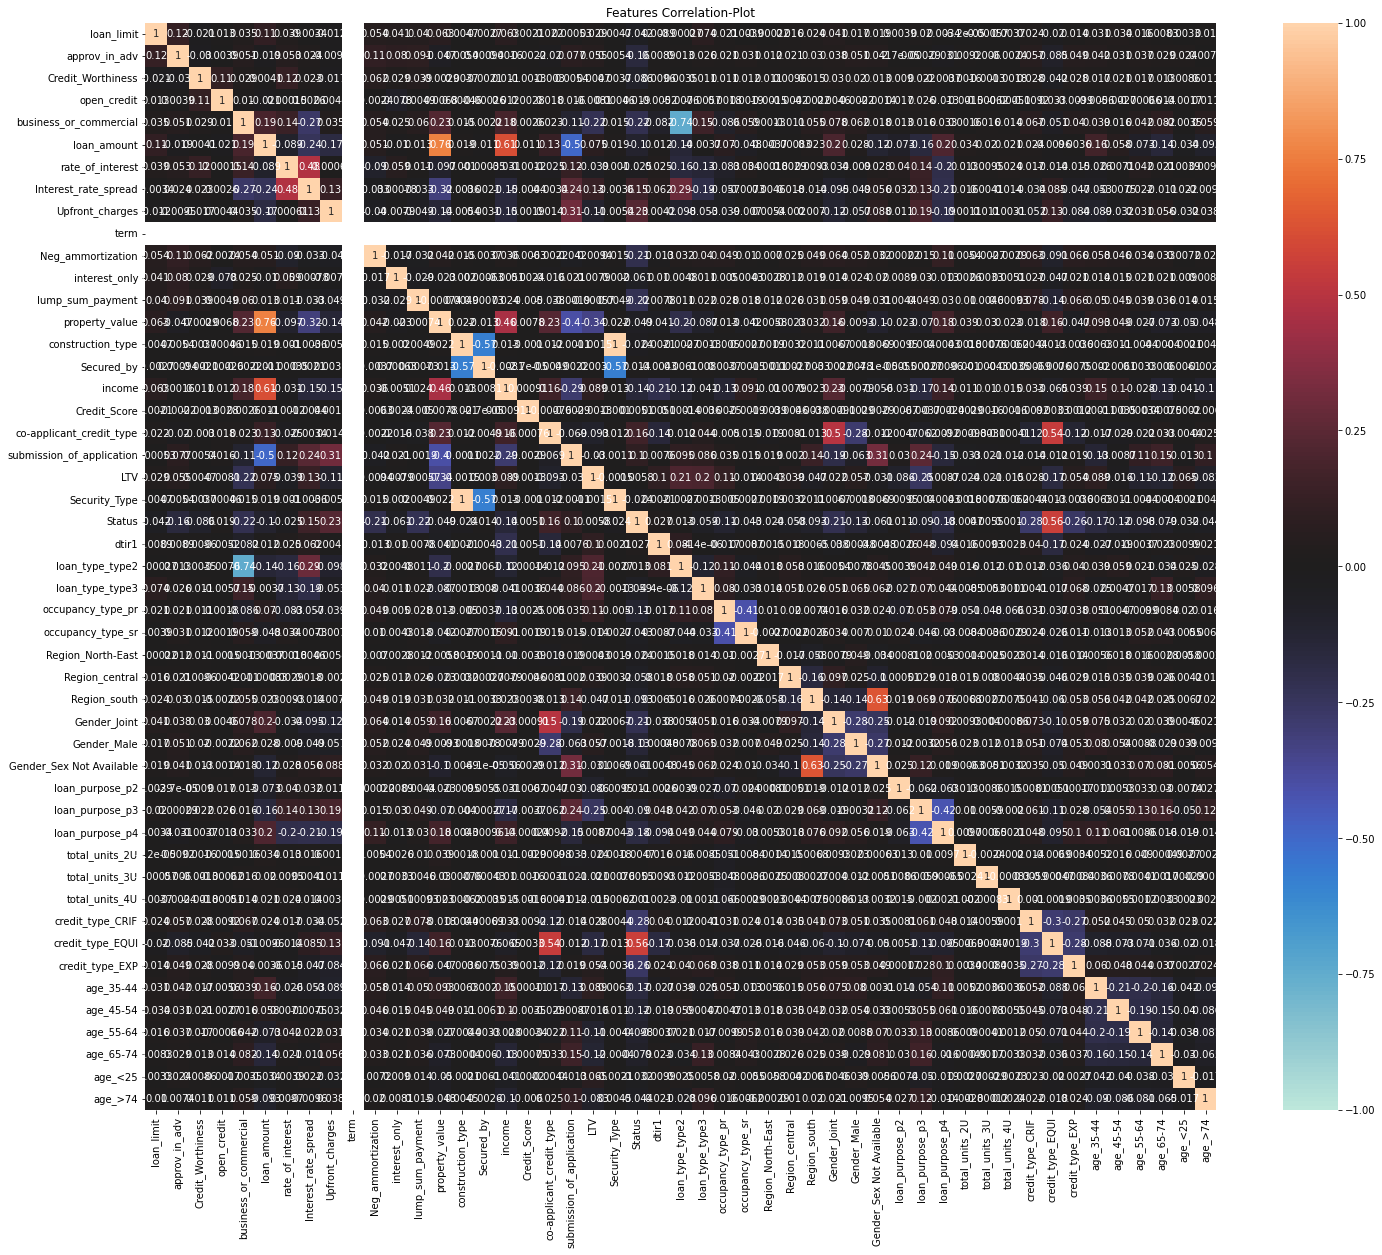

In [19]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. Especially in case of gender & survived.Hence it is clear that probably women were given more importance to save first. Similiary we have obvious strong correlation between fare & Passenger-Class. 

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

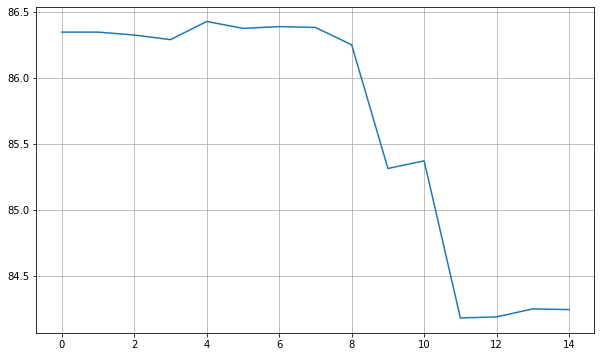

In [130]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-10):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

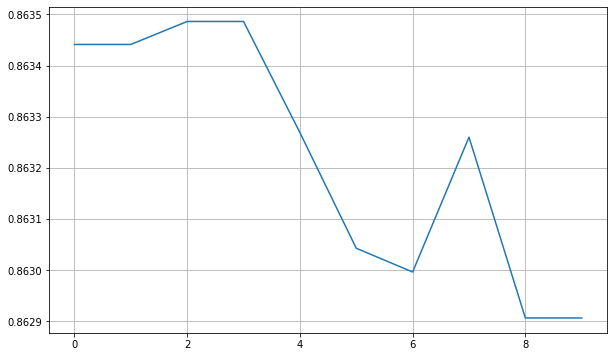

In [131]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(10):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

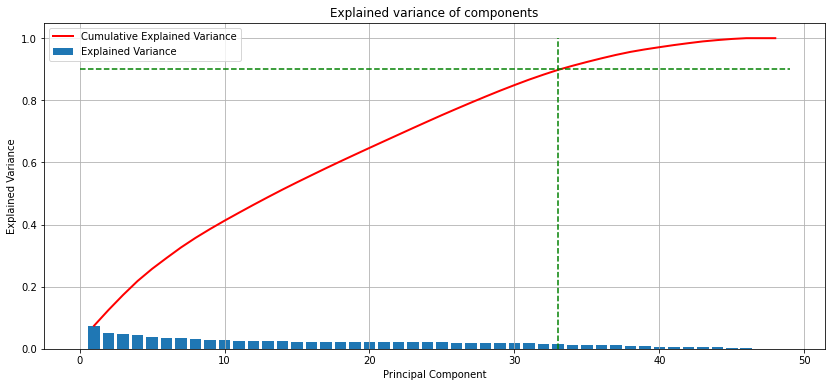

In [139]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([33,33],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

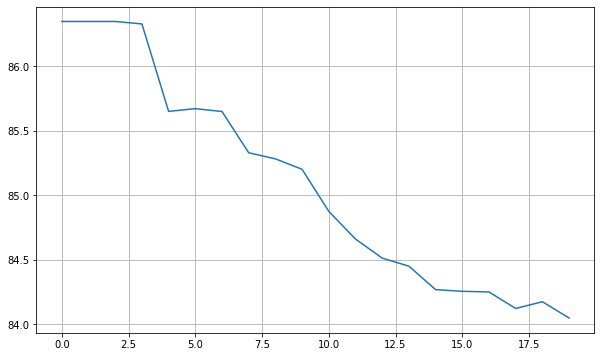

In [134]:
#Applying PCA Transformations

scores=[]
for i in range(20):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)

plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In VIF, RFE & PCA Techniques, we did notice any better scores upon dropping some multicollinear features. But in order to avoid the curse of dimensionality, we can capture top 90% of the data Variance explained by top 33 PCA components.

In [16]:
pca = PCA(n_components=33)
Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

Train_X_std = Train_X_std_pca
Test_X_std = Test_X_std_pca

The shape of final transformed training feature set:
(90825, 33)

The shape of final transformed testing feature set:
(22707, 33)


---

## <center> 6. Predictive Modeling

In [17]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [18]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [19]:
from scikitplot.metrics import plot_roc_curve as auc_roc

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 84.0%
F1 Score = 83.39999999999999%

 Confusiton Matrix:
 [[9966 1424]
 [2200 9117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85     11390
           1       0.86      0.81      0.83     11317

    accuracy                           0.84     22707
   macro avg       0.84      0.84      0.84     22707
weighted avg       0.84      0.84      0.84     22707



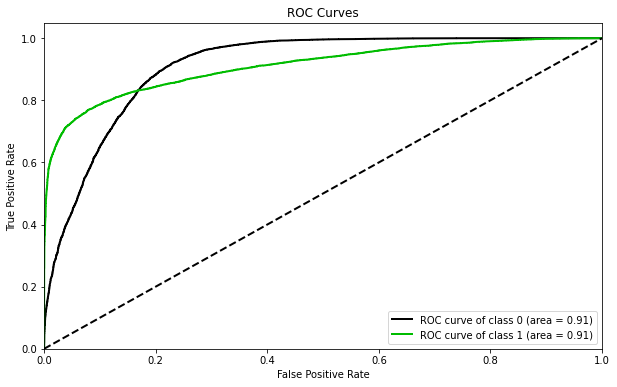


Interpreting the Output of Logistic Regression:

intercept  0.35376623321008677
classes [0 1]


,coeff
0,0.320557
1,-0.018968
2,0.670740
3,-1.369454
4,0.027525
5,-0.365338
6,-0.871133
7,0.074741
8,-0.405222
9,-0.034968


In [20]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 87.7%
F1 Score = 87.7%

 Confusiton Matrix:
 [[ 9884  1506]
 [ 1298 10019]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     11390
           1       0.87      0.89      0.88     11317

    accuracy                           0.88     22707
   macro avg       0.88      0.88      0.88     22707
weighted avg       0.88      0.88      0.88     22707



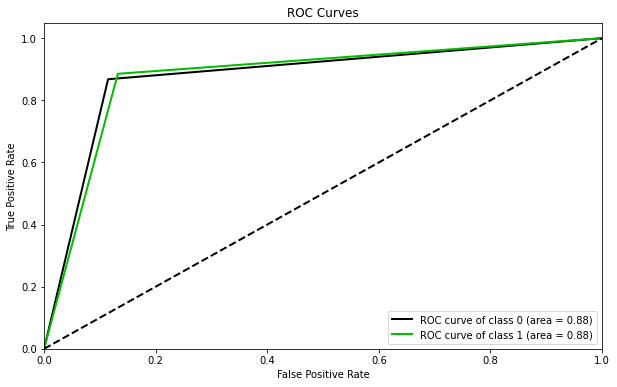


Interpreting the output of Decision Tree:



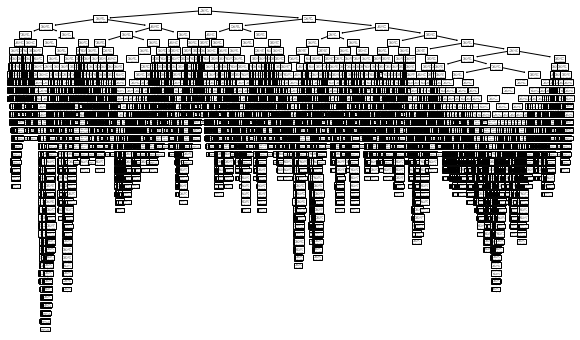

In [21]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 92.80000000000001%
F1 Score = 92.5%

 Confusiton Matrix:
 [[11035   355]
 [ 1269 10048]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     11390
           1       0.97      0.89      0.93     11317

    accuracy                           0.93     22707
   macro avg       0.93      0.93      0.93     22707
weighted avg       0.93      0.93      0.93     22707



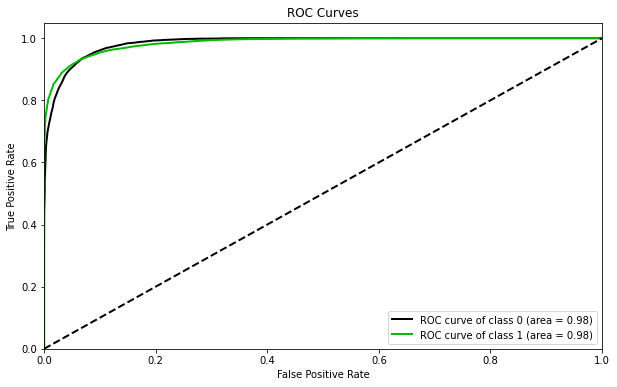


Interpreting the output of Random Forest:



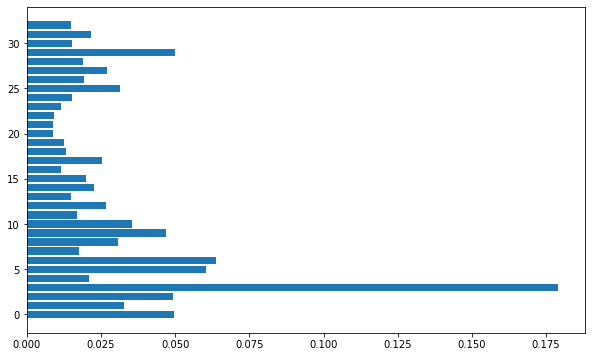

In [22]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 77.10000000000001%
F1 Score = 76.4%

 Confusiton Matrix:
 [[9071 2319]
 [2889 8428]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     11390
           1       0.78      0.74      0.76     11317

    accuracy                           0.77     22707
   macro avg       0.77      0.77      0.77     22707
weighted avg       0.77      0.77      0.77     22707



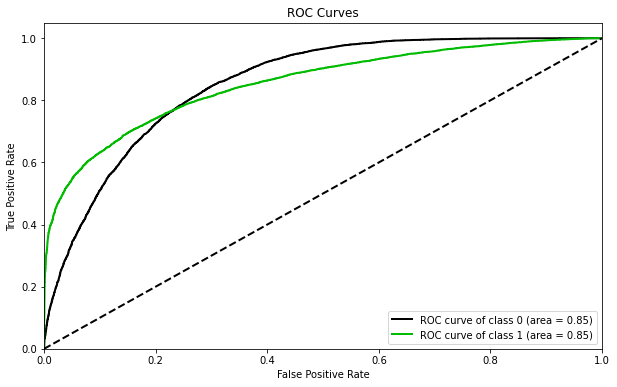

In [23]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 95.89999999999999%
F1 Score = 95.89999999999999%

 Confusiton Matrix:
 [[10891   499]
 [  427 10890]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     11390
           1       0.96      0.96      0.96     11317

    accuracy                           0.96     22707
   macro avg       0.96      0.96      0.96     22707
weighted avg       0.96      0.96      0.96     22707



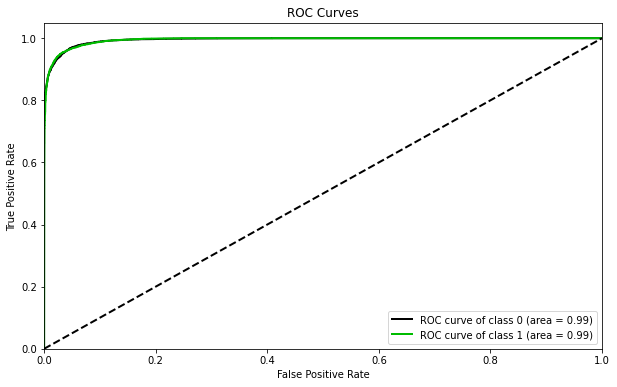

In [30]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 90.4%
F1 Score = 90.5%

 Confusiton Matrix:
 [[10157  1233]
 [  952 10365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11390
           1       0.89      0.92      0.90     11317

    accuracy                           0.90     22707
   macro avg       0.90      0.90      0.90     22707
weighted avg       0.90      0.90      0.90     22707



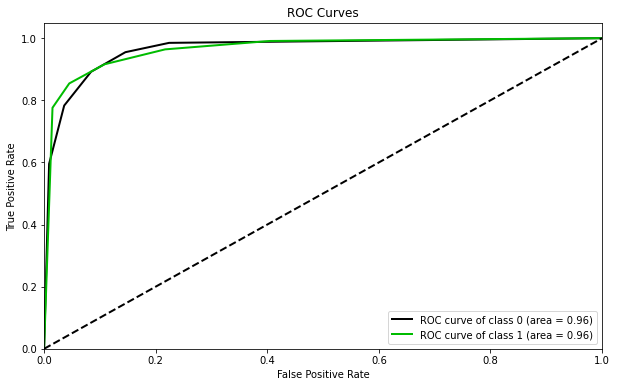

In [24]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 88.8%
F1 Score = 88.2%

 Confusiton Matrix:
 [[10621   769]
 [ 1773  9544]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     11390
           1       0.93      0.84      0.88     11317

    accuracy                           0.89     22707
   macro avg       0.89      0.89      0.89     22707
weighted avg       0.89      0.89      0.89     22707



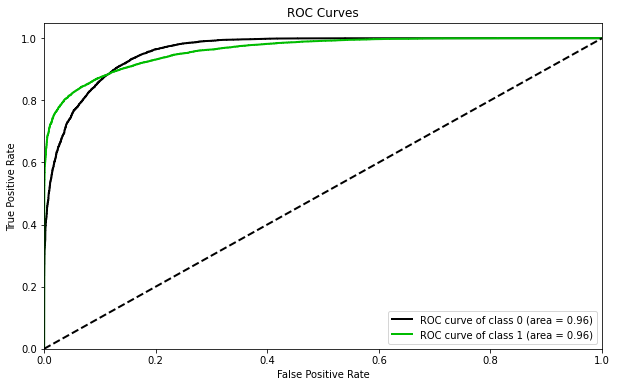

In [25]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[13:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 94.19999999999999%
F1 Score = 94.1%

 Confusiton Matrix:
 [[10735   655]
 [  673 10644]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11390
           1       0.94 

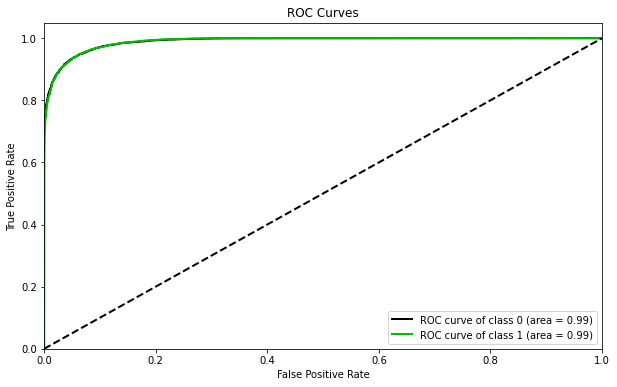

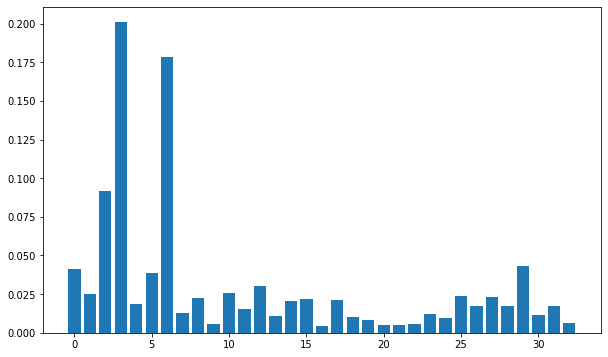

In [26]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

plt.bar( Train_X_std.columns,XGB.feature_importances_,)
plt.show()

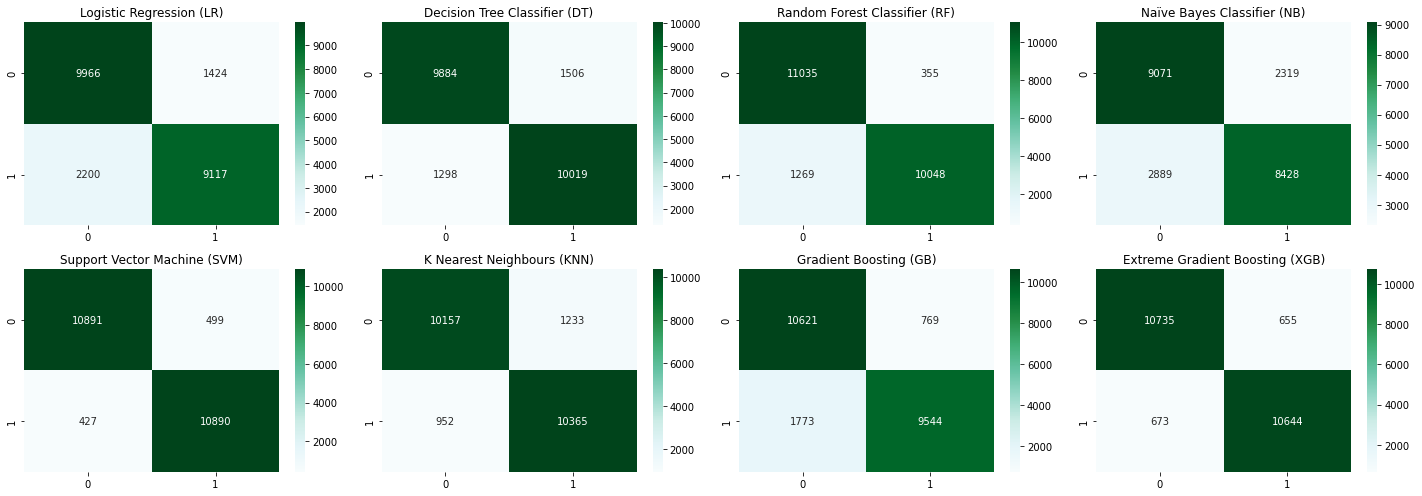

In [31]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

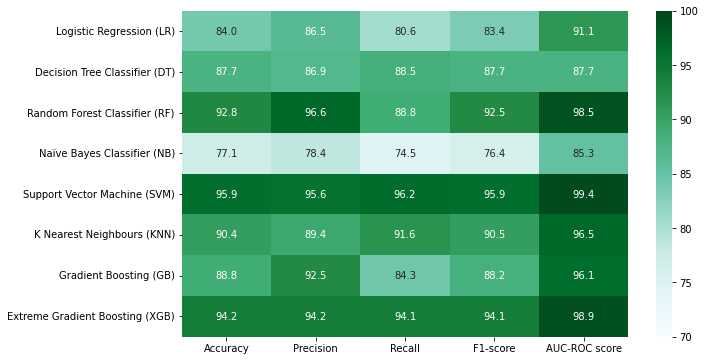

In [47]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=70, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. We can note from the above heatmap that the Boosting & RandomForest Models Performed well on the current dataset...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was large enough summing around 1.5 lakh samples & after preprocessing 31.8% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 15.5% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The SVM, Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>